In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#step1. 데이터 로드& 변수에 할당.
#data load 주피터노트북 버전
data = numpy.loadtxt("C:/Users/GimBoSeong/Documents/DataScience/ICT/Py_Project/20201119_day24/Blood_fat.csv",delimiter=",")
#print(data) #[몸무게, 나이, 혈중지방량]

x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]
y_data = [y_row[2] for y_row in data]
#print(x1)
#print(x2)
#print(y_data)

In [3]:
#step2. 방정식의 변수&식 설정.

#기울기 a1,a2 / y절편b의 값을 정한다.(이걸먼저 않으면 미정의 에러남...)
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
a2 = tf.Variable(tf.random_uniform([1], 0 ,10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1],0,100,dtype=tf.float64, seed=0))

#다중선형회귀 식 설정.
y= a1*x1+a2*x2+b
#print(y)

In [4]:
#step3.학습률 값 설정
learning_rate = 0.001

In [5]:
#step4.텐서플로우 RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

#RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

In [7]:
#step5.학습 진행
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer() )

    for step in range(2001):
        sess.run(gradient_decent)
        if step % 100 == 0 :
            print("Epoch: %.f, RMSE = %.04f, 기울기a1=%.04f, 기울기 a2=%.04f, y절편b=%.04f"
                 %(step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b) ))
            da1=sess.run(a1)
            da2=sess.run(a2)
            db=sess.run(b)
            print("da1 : ,",da1)
            print("da2 : ",da2)
            print("db : ",db)
         
#아래는 예측값.
calc_y=[]
for i in range(25):
    new_y =(da1*x1[i]) + da2*x2[i]+db
    #  print("(da1*x1[i]) + da2*x2[i]+db :",(da1*x1[i]) + da2*x2[i]+db)
    calc_y.append(new_y)
    print(new_y)
sess.close()

Epoch: 0, RMSE = 643.9146, 기울기a1=7.9995, 기울기 a2=8.0295, y절편b=80.6891
da1 : , [7.99945558]
da2 :  [8.02947076]
db :  [80.68914637]
Epoch: 100, RMSE = 51.0198, 기울기a1=1.2999, 기울기 a2=4.2778, y절편b=80.5946
da1 : , [1.29992372]
da2 :  [4.27776566]
db :  [80.59463733]
Epoch: 200, RMSE = 42.6573, 기울기a1=0.8654, 기울기 a2=4.3693, y절편b=80.5900
da1 : , [0.86542757]
da2 :  [4.36930983]
db :  [80.58996441]
Epoch: 300, RMSE = 42.1239, 기울기a1=0.7509, 기울기 a2=4.5693, y절편b=80.5895
da1 : , [0.75094944]
da2 :  [4.56931597]
db :  [80.58945714]
Epoch: 400, RMSE = 41.8101, 기울기a1=0.6632, 기울기 a2=4.7227, y절편b=80.5890
da1 : , [0.6631554]
da2 :  [4.72270311]
db :  [80.58902581]
Epoch: 500, RMSE = 41.6278, 기울기a1=0.5962, 기울기 a2=4.8396, y절편b=80.5887
da1 : , [0.59624432]
da2 :  [4.83960617]
db :  [80.58865424]
Epoch: 600, RMSE = 41.5226, 기울기a1=0.5454, 기울기 a2=4.9284, y절편b=80.5883
da1 : , [0.54543868]
da2 :  [4.92837184]
db :  [80.58832896]
Epoch: 700, RMSE = 41.4623, 기울기a1=0.5069, 기울기 a2=4.9956, y절편b=80.5880
da1 : , [0.5069

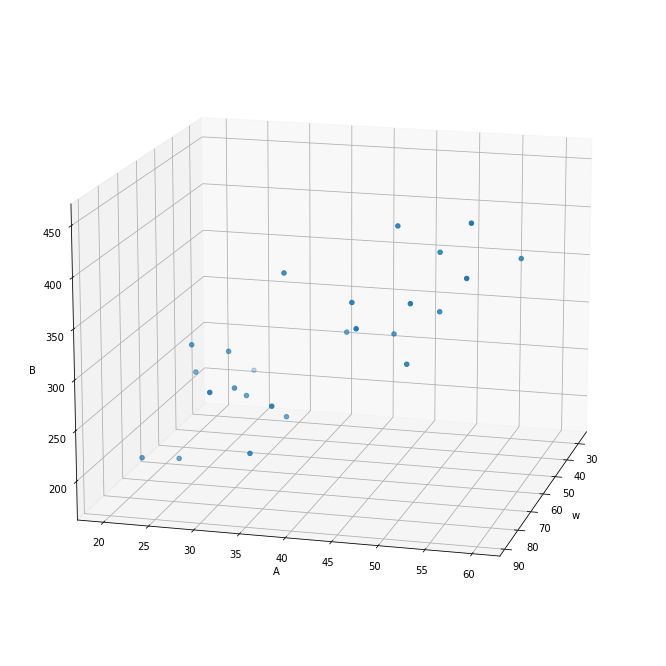

In [10]:
#3차원 그래프 그리기
import matplotlib.pyplot as plt #혹시 없는경우 !pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12)) #figure(그래프가 그려지는 객체) 생성
ax  = fig.add_subplot(111,projection='3d') #전체공간을 1*1로 잡은 중 첫번째(111), 3d로 표시, 전체공간을 나누는 개념.
                                           #projection='3d' : 표고와 방위각을 지정하여 3d그래프가 보이는 방향을 설정한다.           
#산점도 플롯을 만듦
ax.scatter(x1,x2,y_data) #실제데이터의 그래프를 생성.
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

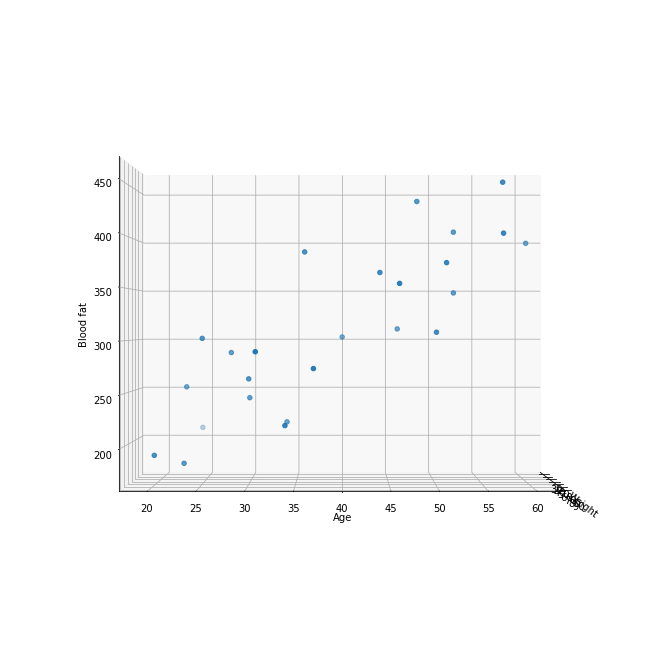

In [13]:
#3차원 그래프 그리기
import matplotlib.pyplot as plt #혹시 없는경우 !pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12)) #figure(그래프가 그려지는 객체) 생성
ax  = fig.add_subplot(111,projection='3d') #전체공간을 1*1로 잡은 중 첫번째(111), 3d로 표시, 전체공간을 나누는 개념.
                                           #projection='3d' : 표고와 방위각을 지정하여 3d그래프가 보이는 방향을 설정한다.           
#산점도 플롯을 만듦
ax.scatter(x1,x2,y_data) 
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(elev=0, azim=0) #보는 각도를 정면으로 설정.
plt.show()

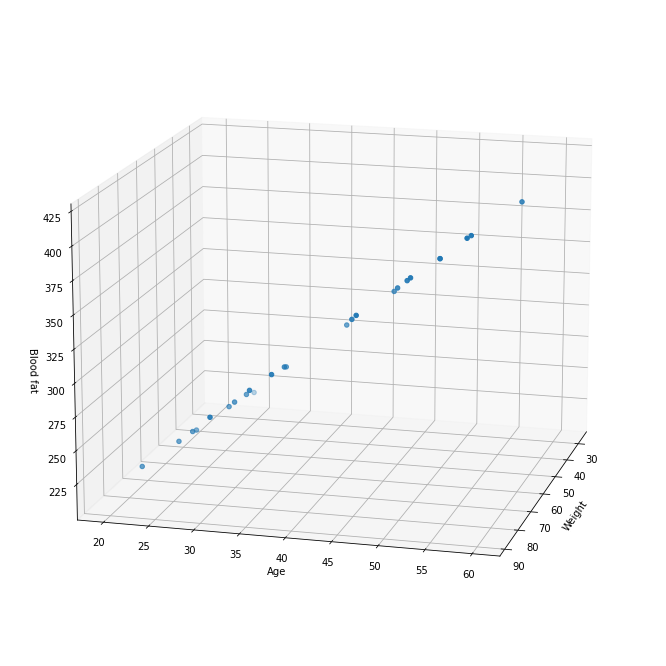

In [11]:
#3차원 그래프 그리기
import matplotlib.pyplot as plt #혹시 없는경우 !pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12)) #figure(그래프가 그려지는 객체) 생성
ax  = fig.add_subplot(111,projection='3d') #전체공간을 1*1로 잡은 중 첫번째(111), 3d로 표시, 전체공간을 나누는 개념.
                                           #projection='3d' : 표고와 방위각을 지정하여 3d그래프가 보이는 방향을 설정한다.           

#산점도 플롯을 만듦    
ax.scatter(x1,x2,calc_y) #이번에는 예측된 값(calc_y)을 찍는다.
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

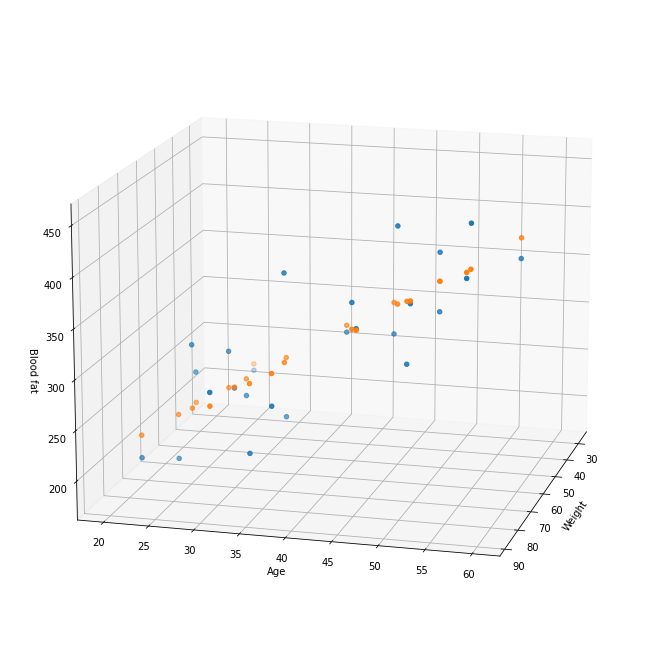

In [14]:
#3차원 그래프 그리기
import matplotlib.pyplot as plt #혹시 없는경우 !pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12)) #figure(그래프가 그려지는 객체) 생성
ax  = fig.add_subplot(111,projection='3d') #전체공간을 1*1로 잡은 중 첫번째(111), 3d로 표시, 전체공간을 나누는 개념.
                                           #projection='3d' : 표고와 방위각을 지정하여 3d그래프가 보이는 방향을 설정한다.           
#산점도 플롯을 만듦
ax.scatter(x1,x2,y_data) #실제데이터의 그래프를 생성.
ax.scatter(x1,x2,calc_y) #이번에는 예측된 값(calc_y)을 찍는다.
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

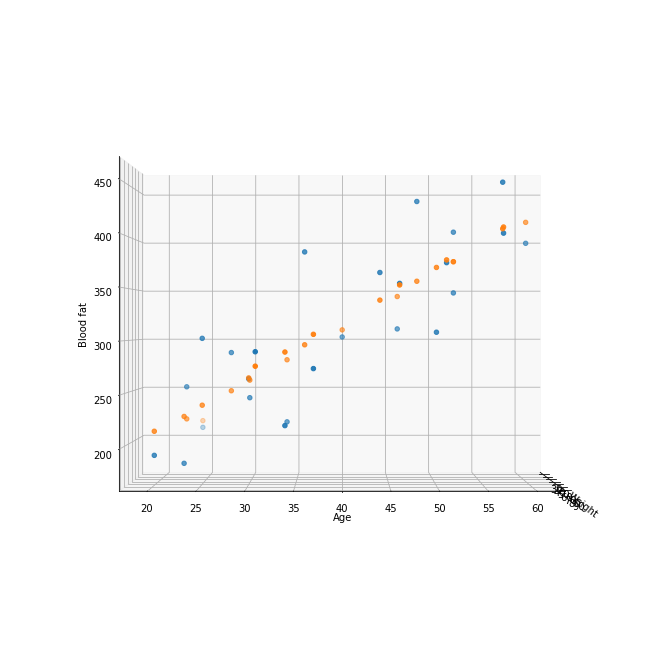

In [15]:
#3차원 그래프 그리기
import matplotlib.pyplot as plt #혹시 없는경우 !pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12)) #figure(그래프가 그려지는 객체) 생성
ax  = fig.add_subplot(111,projection='3d') #전체공간을 1*1로 잡은 중 첫번째(111), 3d로 표시, 전체공간을 나누는 개념.
                                           #projection='3d' : 표고와 방위각을 지정하여 3d그래프가 보이는 방향을 설정한다.           
#산점도 플롯을 만듦
ax.scatter(x1,x2,y_data) #실제데이터의 그래프를 생성.
ax.scatter(x1,x2,calc_y) #이번에는 예측된 값(calc_y)을 찍는다.
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(0,0)
plt.show()